# World Happiness Report

In [1]:
pip install plotly

You should consider upgrading via the '/Users/hitesh/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Main Goals

Find which factors influence the happiness across the world the most. 
- In our EDA we explored factors that are most correlated with happiness.
- We plan to use machine learning models (regression) to predict hapiness score.
- We plan to test our model with 80-20 train test split.

## Our Data

The world hapiness index is a component of the World Happiness Report published by the UN annually using factors such as: Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, and Perceptions of corruption. Their aim is to compare countries to each other to determine why some are doing better than others.

Our data includes the socioeconomic indicators for each country and the happiness index (`Life Ladder`).

## Data Processing

Importing packages and dataset used for analysis

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA

In [79]:
df = pd.read_csv('data/world-happiness-report.csv')
df_2021 = pd.read_csv('data/world-happiness-report-2021.csv')
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


Renaming and keeping the columns of the dataset appropriate to our analysis

In [80]:
df.rename(columns={'Country name':'country', 'Life Ladder':'happiness_score'
                   , 'Log GDP per capita':'log_gdp','Perceptions of corruption':'corruption',
                  "Social support":"social_support", "Healthy life expectancy at birth":'life_expectancy',
                  "Freedom to make life choices":"freedom"}, inplace=True)

df = df.drop(['Positive affect','Negative affect'], axis = 1)
df

,country,year,happiness_score,log_gdp,social_support,life_expectancy,freedom,Generosity,corruption
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776
...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831


##### Check for any missing values 

In [81]:
df.isnull().sum()

country              0
year                 0
happiness_score      0
log_gdp             36
social_support      13
life_expectancy     55
freedom             32
Generosity          89
corruption         110
dtype: int64

Above is the sum of the missing values for each column
Below we have the number of rows that have a missing value for each country

In [82]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
pd.options.display.max_rows = 15
rows_with_NaN['country'].value_counts()

China                        15
Kosovo                       14
Jordan                       13
Saudi Arabia                 13
Hong Kong S.A.R. of China    11
                             ..
Laos                          1
Tunisia                       1
Cuba                          1
Denmark                       1
Poland                        1
Name: country, Length: 71, dtype: int64

China has no corruption score for all years

In [83]:
df.loc[df['country']=='China']

,country,year,happiness_score,log_gdp,social_support,life_expectancy,freedom,Generosity,corruption
342,China,2006,4.560,8.696,0.747,66.88,NaN,NaN,NaN
343,China,2007,4.863,8.824,0.811,67.06,NaN,-0.176,NaN
344,China,2008,4.846,8.911,0.748,67.24,0.853,-0.092,NaN
345,China,2009,4.454,8.996,0.798,67.42,0.771,-0.160,NaN
346,China,2010,4.653,9.092,0.768,67.60,0.805,-0.133,NaN
347,China,2011,5.037,9.179,0.787,67.76,0.824,-0.186,NaN
348,China,2012,5.095,9.249,0.788,67.92,0.808,-0.185,NaN
349,China,2013,5.241,9.319,0.778,68.08,0.805,-0.158,NaN
350,China,2014,5.196,9.386,0.820,68.24,NaN,-0.217,NaN
351,China,2015,5.304,9.449,0.794,68.40,NaN,-0.244,NaN


We can't drop all missing rows because we would be dropping China as a whole. So we replaced all missing values with 0 since there is no data to generate an average value (or other imputation methods). 

In [84]:
# replace NA with 0
#df = df.fillna(0)
df = df.dropna()

In [85]:
df.isnull().sum()

country            0
year               0
happiness_score    0
log_gdp            0
social_support     0
life_expectancy    0
freedom            0
Generosity         0
corruption         0
dtype: int64

##### Check duplicate rows

In [86]:
len(df[df.duplicated()])

0

## Early Data Analysis

Initial view of happiness across the world

In [87]:
fig = px.choropleth(locations=df_2021['Country name'], locationmode="country names", color=df_2021['Ladder score'],
                    labels = {'color':'Score'},color_continuous_scale = 'Blues')
fig.update_layout(title='Happiness Index Across the World',title_x=0.5)
fig.show()

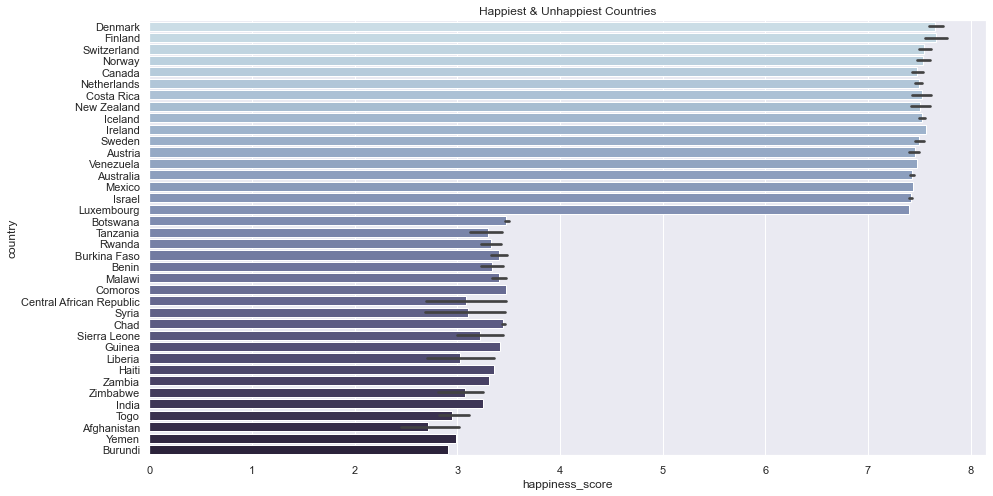

In [88]:
df_2021_happy_unhappy = df[(df.loc[:,'happiness_score']> 7.4) | (df.loc[:,'happiness_score']< 3.5)].sort_values(by='happiness_score',ascending=False)
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = 'happiness_score', y = 'country', data=df_2021_happy_unhappy,palette='ch:s=.25,rot=-.25')
plt.title('Happiest & Unhappiest Countries')
plt.show()

In [89]:
# sns.countplot(df_2021['region'])
# plt.title('Number Of Countires in Region')
# plt.ylabel('Number Of Countries')
# plt.xlabel('Region')
# plt.xticks(rotation = 90)
# plt.show()

Across the years, we are missing data from 80 countries.

In [90]:
(df[df['year'] == 2020].groupby('country')['happiness_score'].mean() - df[df['year'] == 2005].groupby('country')['happiness_score'].mean()).isna().sum()

80

Distribution of data across all countries

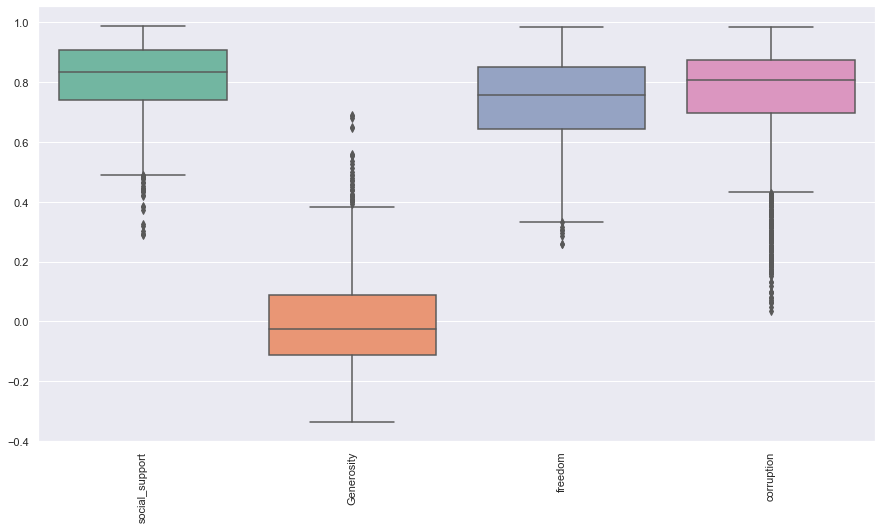

In [92]:
features = ['social_support','Generosity', 'freedom', 'corruption']
sns.boxplot(data= df.loc[:,features], orient = 'v',palette = 'Set2')
plt.xticks(rotation=90)
plt.show()

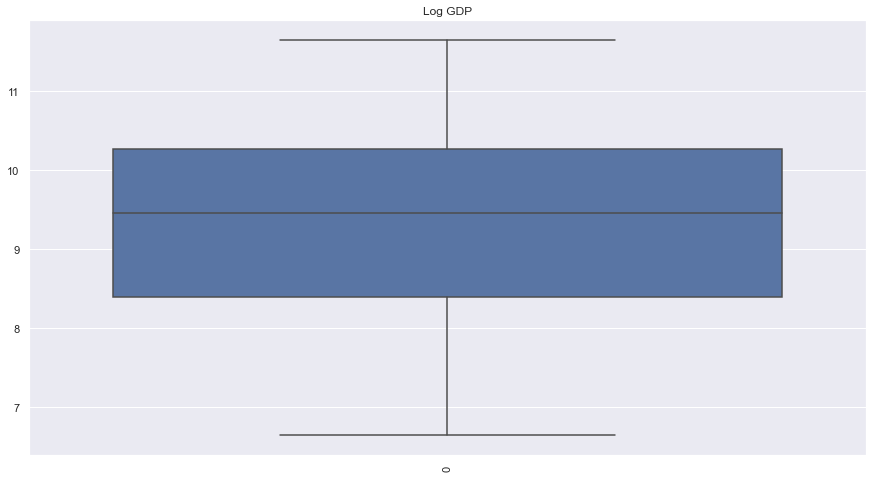

<Figure size 1440x1440 with 0 Axes>

In [93]:
sns.boxplot(data=df['log_gdp'])
plt.xticks(rotation=90)
plt.title("Log GDP")
fig=plt.figure(figsize=(20,20))
plt.show()

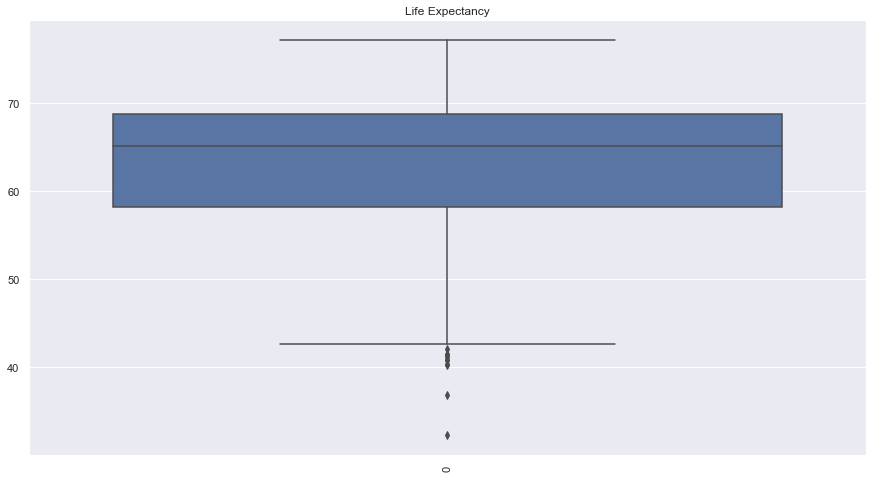

In [94]:
sns.boxplot(data=df['life_expectancy'])
plt.title("Life Expectancy")
plt.xticks(rotation=90)
plt.show()

There are 36 years across all countries with no GDP per capita reported or no life expectancy reported, 7 countries are removed by dropping these years, leaving us with a total of 155 so we will simply drop these observations. 

In [100]:
df = df[df['log_gdp'] != 0]
df = df[df['life_expectancy'] != 0]

In [101]:
len(df.country.unique())

155

Correlations between various features

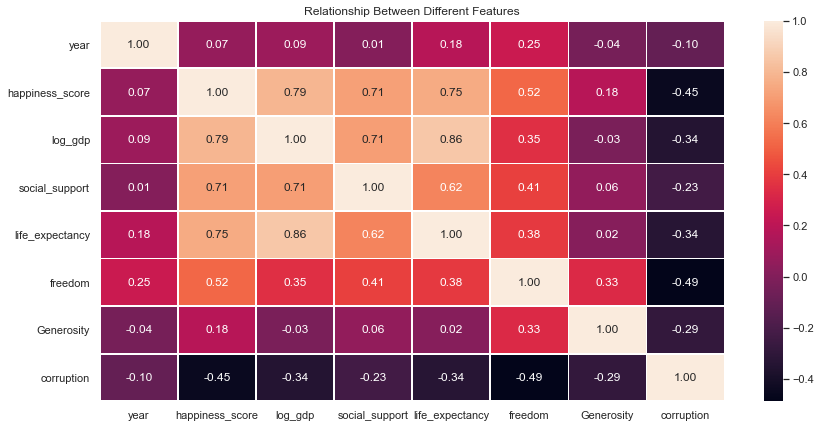

In [102]:
plt.figure(figsize = (14,7))
sns.heatmap(df.corr(), annot = True, fmt = '.2f',linewidth = 0.8)
plt.title('Relationship Between Different Features')
plt.show()

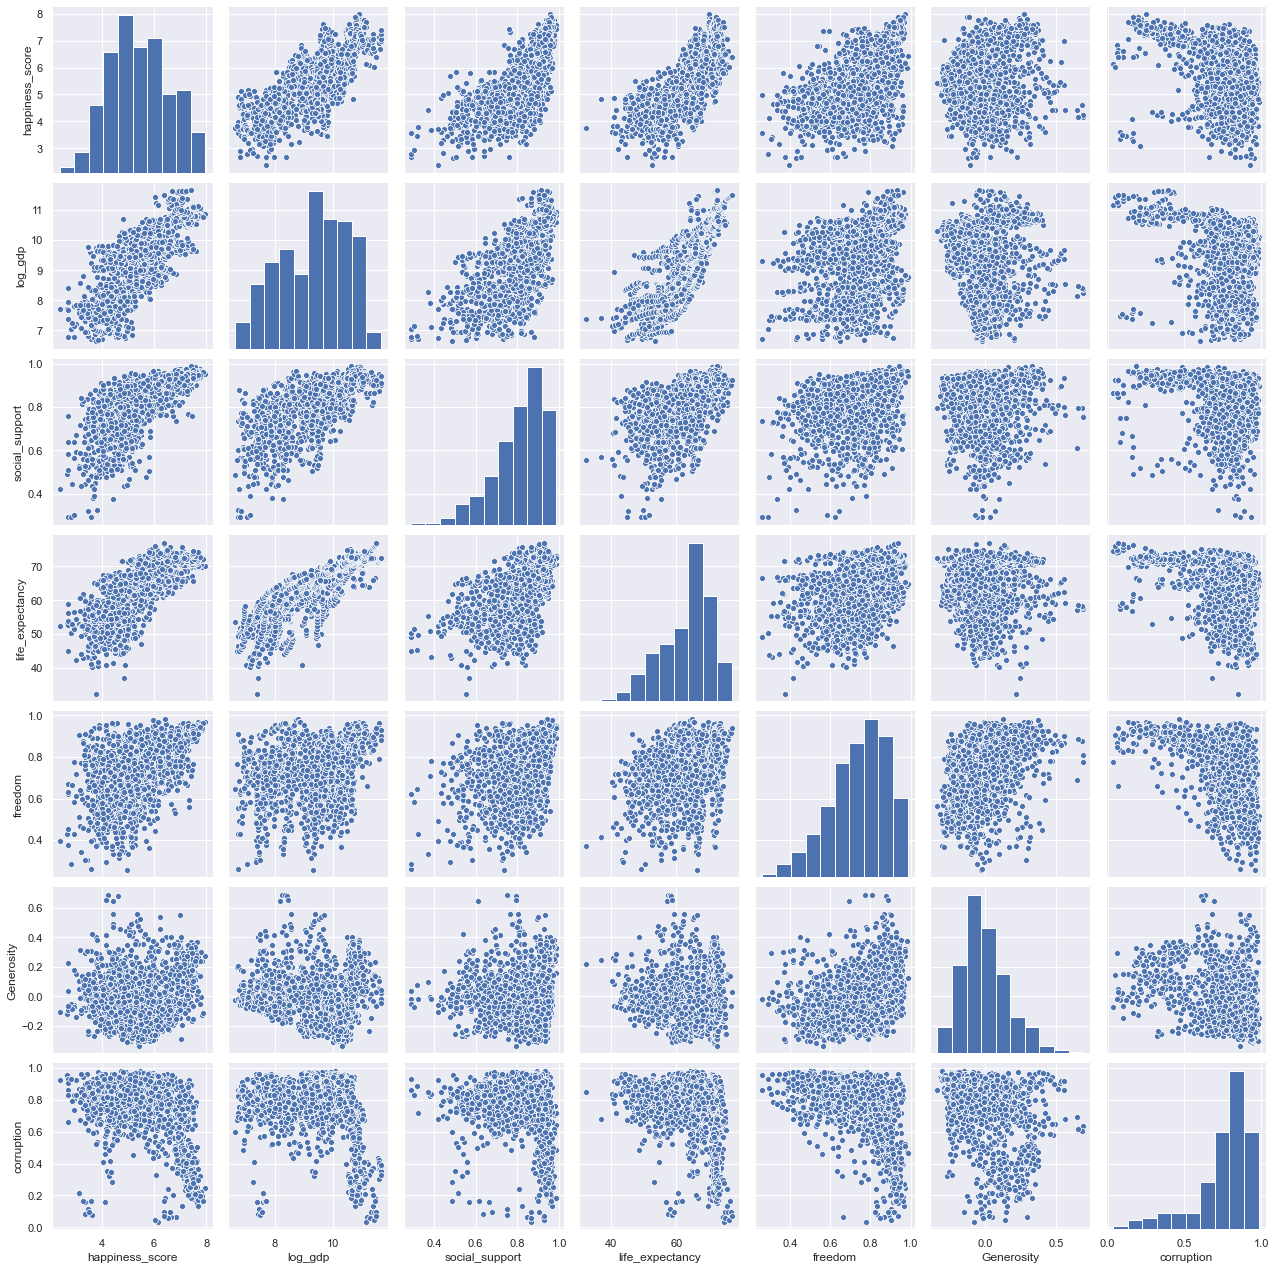

In [116]:
sns.pairplot(df.drop(['year'], axis = 1))

Correlation with happiness 

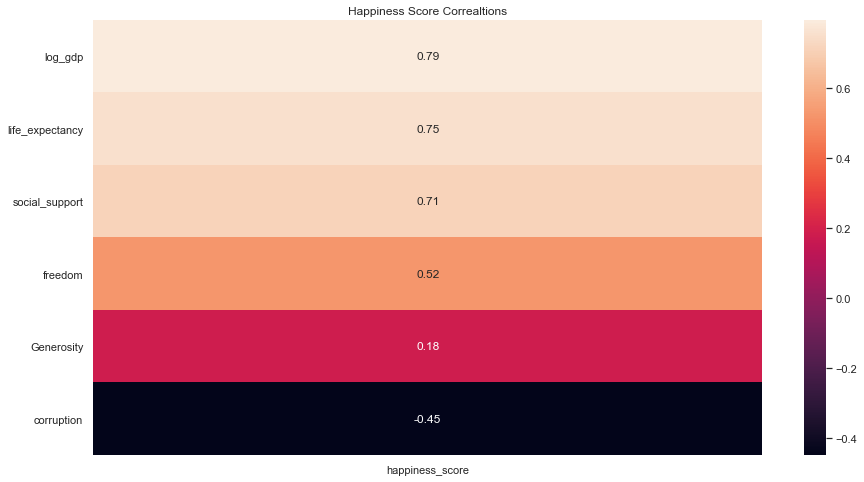

In [104]:
happiness = df.corr()['happiness_score'].to_frame().sort_values('happiness_score', ascending=False)
happiness = happiness.drop(['year', 'happiness_score'])
sns.heatmap(happiness, annot=True)
plt.title("Happiness Score Correaltions")
plt.show()

### Hypothesis

Based on our EDA, we hypothesize that social support, log GDP, freedom,, and life_expectancy have a positive correlation and corruption has a negative correlation with the happiness score of a country.

## Modeling

### Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

We split our dataset into the features(X) and the true values(y) and use a 80-20 train-test split

In [107]:
train, test = train_test_split(df, test_size=0.2, random_state=12345)
print('Training set has', train.shape[0], 'rows')
print('Test set has', test.shape[0], 'rows')
y_train = train["happiness_score"]
X_train = train.drop(columns={"happiness_score","country","year"})
y_test = test["happiness_score"]
X_test = test.drop(columns={"happiness_score","country","year"})

Training set has 1369 rows
Test set has 343 rows


We standardize the features to see which features are most influential once we fit the multiple linear regression

In [108]:
from sklearn.preprocessing import StandardScaler
xcol = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = xcol)
X_train.head()

,log_gdp,social_support,life_expectancy,freedom,Generosity,corruption
0,0.434332,0.744972,0.020143,-0.666852,-1.320639,-0.497289
1,1.175225,0.605161,1.328110,0.325734,-0.542724,-0.680442
2,-0.969057,-1.080785,-1.048337,-0.100659,-0.462463,0.014461
3,0.041486,0.596937,-0.145656,-1.792248,-1.147769,1.102602
4,0.147451,-0.834061,0.788606,0.095062,0.062321,0.763231


In [109]:
model.fit(X_train, y_train)
pd.Series(model.coef_, index=X_train.columns).sort_values()

corruption        -0.132824
Generosity         0.113691
freedom            0.144714
life_expectancy    0.241959
social_support     0.264643
log_gdp            0.413459
dtype: float64

##### Model Evaluation

We use the mean squared error to evaluate our model

In [110]:
y_pred = model.predict(X_test)
np.mean((y_test - y_pred)**2) # mean squared error 

376.1516877669694

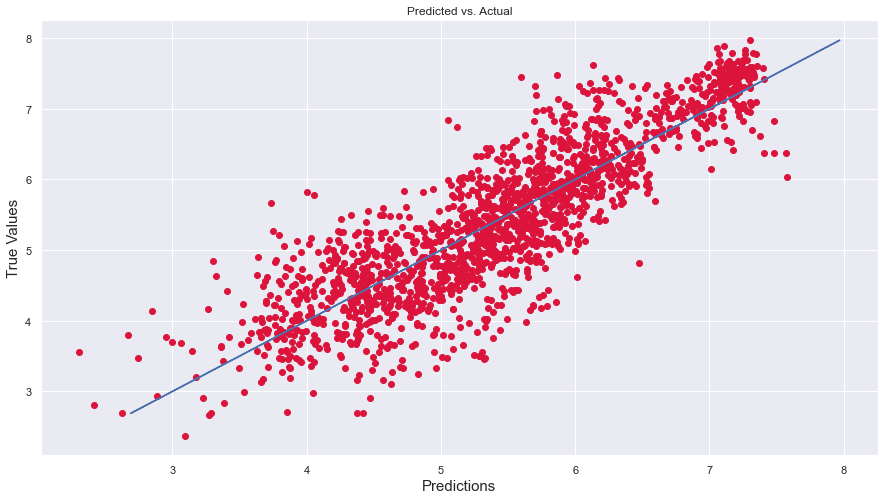

In [111]:
X = df.drop(columns={"happiness_score","country","year"})
y = df["happiness_score"]
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(x=y_pred, y=y, c = 'crimson')
a, b = np.polyfit(y_pred, y, 1)
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.plot(y_test, a*y_test+b) 
plt.title("Predicted vs. Actual")
plt.show()

In [112]:
print('R squared =', round(np.corrcoef(y_pred, y=y)[0,1]**2,3))

R squared = 0.753


#### Cross Validation

In [113]:
from sklearn.model_selection import cross_val_score

In [135]:
cv_fullmod = cross_val_score(estimator=model, X=X_train, y=y_train, scoring="neg_mean_squared_error", cv=i)
print('MAE for the full model:', -cv_fullmod.mean())
cv_simplemod2 = cross_val_score(estimator=model, X=df[['log_gdp','life_expectancy']], 
                                   y=df['happiness_score'], scoring="neg_mean_squared_error", cv=i)
print('MAE for the simple model with only log GDP and life expectancy:', -cv_simplemod2.mean())
cv_simplemod = cross_val_score(estimator=model, X=df[['log_gdp']], 
                                   y=df['happiness_score'], scoring="neg_mean_squared_error", cv=i)
print('MAE for the simple model with only log GDP:', -cv_simplemod.mean())

MAE for the full model: 0.2158552855662577
MAE for the simple model with only log GDP and life expectancy: 0.468601959543921
MAE for the simple model with only log GDP: 0.5152065157139096


### K Nearest Neighbors

In [117]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

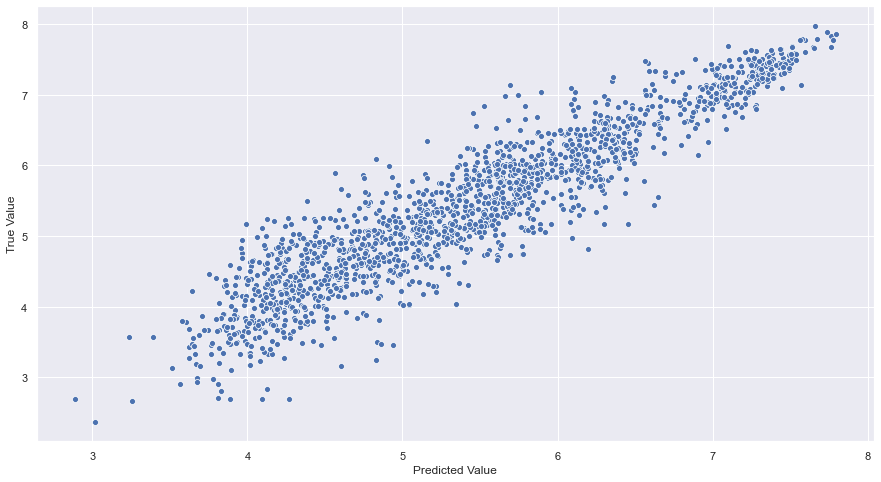

In [127]:
knn.fit(X=df.iloc[:,3:], y=df.happiness_score)
yhat = knn.predict(X=df.iloc[:,3:])
sns.scatterplot(x=yhat, y=df.happiness_score)
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

#### Model Evaluation

In [128]:
train, test = train_test_split(df, test_size=0.2, random_state=12345)
print('Training set has', train.shape[0], 'rows')
print('Test set has', test.shape[0], 'rows')

Training set has 1369 rows
Test set has 343 rows


In [129]:
model = KNeighborsRegressor()
model.fit(X=train.iloc[:,3:], y=train.happiness_score)
y_pred = model.predict(X=test.iloc[:,3:])

In [130]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [131]:
mean_squared_error(y_true=test['happiness_score'], y_pred=y_pred)

0.2934232824489797

In [132]:
mean_absolute_error(y_true=test['happiness_score'], y_pred=y_pred)

0.4072775510204082

In [134]:
r2_score(y_true=test['happiness_score'], y_pred=y_pred)

0.771047136127294

#### Choosing k

In [142]:
print("MSE:")
for i in range(1,20):
    knn1 = KNeighborsRegressor(n_neighbors = i)
    knn1.fit(X=train.iloc[:,3:], y=train.happiness_score)
    y_pred1 = knn1.predict(X=test.iloc[:,3:])
    print('K = '+ str(i)+':', mean_squared_error(y_true=test['happiness_score'], y_pred=y_pred1))

MSE:
K = 1: 0.43201108746355693
K = 2: 0.32148210568513125
K = 3: 0.30460993100097183
K = 4: 0.29443910714285715
K = 5: 0.2934232824489797
K = 6: 0.2823407017330742
K = 7: 0.2833411796275362
K = 8: 0.2768886987518222
K = 9: 0.27677926858150675
K = 10: 0.2761620704956269
K = 11: 0.2775251544225719
K = 12: 0.2797149345845481
K = 13: 0.2825706815429469
K = 14: 0.28463153932885116
K = 15: 0.29225198785876255
K = 16: 0.3005793052910897
K = 17: 0.30489481360275206
K = 18: 0.30448201782564877
K = 19: 0.3090734882372419


K = 9 seems to be the best model, with the lowest MSE